<a href="https://colab.research.google.com/github/gakurujnr/Autolib-electric-car-sharing-service-company/blob/master/GROUP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CORE

# GROUP PROJECT

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> To predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final 
>destination.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

### Importing Libraries 

#### a. Basic Python Libraries

In [0]:
# Importing os
import os


# Importing Numpy
import numpy as np


# Importing Pandas
import pandas as pd


# Importing Seaborn
import seaborn as sns


# Importing researchpy
!pip install researchpy
import researchpy as rp


# Importing scipy from stats
from scipy import stats


# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_1samp



from IPython.display import display


# Importing warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)



#### b. Machine Learning Libraries

In [0]:

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Importing Data

In [0]:
# Loading the Data from the source i.e. csv
# ---

train = pd.read_csv('Train.csv')

test = pd.read_csv('Test.csv')

riders = pd.read_csv('Riders.csv')


## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
#

print('The train dataset has ', train.shape[1], ' columns and ', train.shape[0], ' rows!')

print('The test dataset has ', test.shape[1], ' columns and ', test.shape[0], ' rows!')

print('The riders dataset has ', riders.shape[1], ' columns and ', riders.shape[0], ' rows!')

The train dataset has  29  columns and  21201  rows!
The test dataset has  25  columns and  7068  rows!
The riders dataset has  5  columns and  960  rows!


In [0]:
# Previewing the top of our dataset
#

train.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455


In [0]:
# Test

test.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26


In [0]:
# Riders

riders.head(3)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466


In [0]:
# Previewing the bottom of our dataset
# 

train.tail(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,4,5:30:17 PM,7,4,5:50:52 PM,7,4,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,3,9:38:59 AM,4,3,9:45:15 AM,4,3,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380
21200,Order_No_9836,User_Id_718,Bike,3,Business,26,2,2:19:47 PM,26,2,2:20:01 PM,26,2,2:24:29 PM,26,2,2:41:55 PM,26,2,3:17:23 PM,12,30.9,NaN,-1.255189,36.782203,-1.320157,36.830887,Rider_Id_177,2128


In [0]:
test.tail(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
7065,Order_No_1969,User_Id_136,Bike,3,Business,5,3,2:45:12 PM,5,3,2:45:36 PM,5,3,3:00:15 PM,5,3,3:07:52 PM,10,25.1,NaN,-1.301446,36.766138,-1.264960,36.798178,Rider_Id_379
7066,Order_No_10591,User_Id_1979,Bike,3,Personal,29,2,3:18:26 PM,29,2,3:19:45 PM,29,2,3:40:47 PM,29,2,3:46:35 PM,18,23.6,NaN,-1.248404,36.678276,-1.272027,36.817411,Rider_Id_474
7067,Order_No_1603,User_Id_1721,Bike,3,Business,4,2,3:37:09 PM,4,2,3:43:40 PM,4,2,3:58:05 PM,4,2,4:04:43 PM,8,22.3,NaN,-1.255189,36.782203,-1.300406,36.829741,Rider_Id_76


In [0]:
riders.tail(3)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
957,Rider_Id_270,338,96,14.4,41
958,Rider_Id_201,159,96,15.0,9
959,Rider_Id_904,172,108,13.7,18


In [0]:
#variable definitions

variable = pd.read_csv('VariableDefinitions (1).csv')

variable

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [0]:
# Checking whether each column has an appropriate datatype
#
print('TRAIN dtypes:')
print(train.dtypes)

print('\n')

print('TEST dtypes:')
print(test.dtypes)

print('\n')

print('RIDERS dtypes:')
print(riders.dtypes)

TRAIN dtypes:
Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday

In [0]:
# Checking unique values and number of rows asigned for each column in the dataset

for i in train.columns:
  
  print('\n')
  
  print(train[i].value_counts())




Order_No_7233     1
Order_No_20513    1
Order_No_2297     1
Order_No_15660    1
Order_No_10173    1
Order_No_19980    1
Order_No_26082    1
Order_No_14696    1
Order_No_11939    1
Order_No_27827    1
Order_No_16601    1
Order_No_3283     1
Order_No_14018    1
Order_No_14342    1
Order_No_15703    1
Order_No_17597    1
Order_No_1921     1
Order_No_16626    1
Order_No_21228    1
Order_No_17790    1
Order_No_20474    1
Order_No_15614    1
Order_No_4916     1
Order_No_6520     1
Order_No_14768    1
Order_No_3349     1
Order_No_6922     1
Order_No_14061    1
Order_No_3814     1
Order_No_22702    1
                 ..
Order_No_18682    1
Order_No_14344    1
Order_No_19743    1
Order_No_4792     1
Order_No_18167    1
Order_No_8927     1
Order_No_25631    1
Order_No_18317    1
Order_No_26964    1
Order_No_7197     1
Order_No_12849    1
Order_No_15662    1
Order_No_13121    1
Order_No_6865     1
Order_No_6508     1
Order_No_888      1
Order_No_5149     1
Order_No_26577    1
Order_No_9005     

In [0]:
# checking the profile of our dataset

import pandas_profiling

pandas_profiling.ProfileReport(train)

Number of variables,29
Number of observations,21201
Total Missing (%),4.1%
Total size in memory,4.7 MiB
Average record size in memory,232.0 B
Numeric,11
Categorical,8
Boolean,0
Date,0
Text (Unique),1
Rejected,9


## 4. Tidying the Dataset

In [0]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

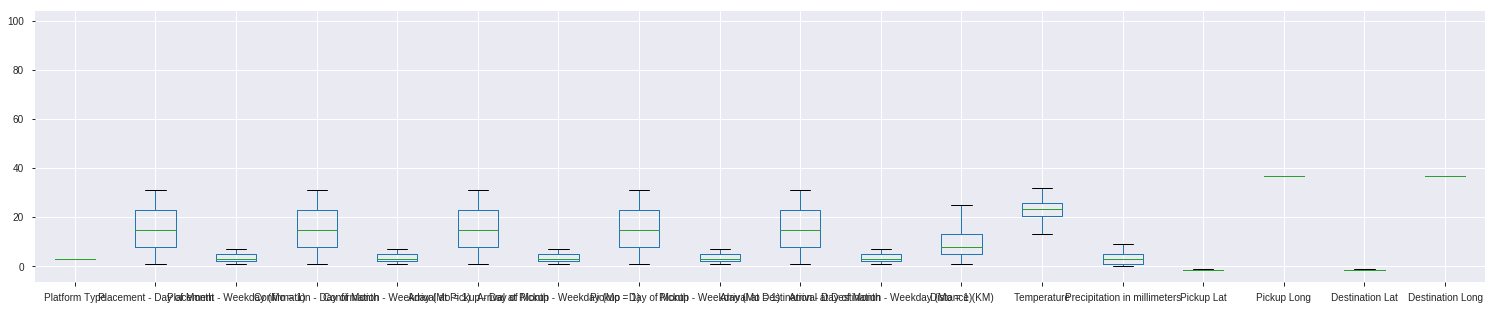

In [0]:
# Checking for Outliers
#
%matplotlib inline

cols = [col for col in train.columns if col not in ['Time from Pickup to Arrival']]
train[cols].plot.box(figsize=(26,5))

plt.show()

In [0]:
# Checking for Anomalies
#

train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [0]:
# Identifying existence of missing data in the dataset

train.isnull().any()

Order No                                     False
User Id                                      False
Vehicle Type                                 False
Platform Type                                False
Personal or Business                         False
Placement - Day of Month                     False
Placement - Weekday (Mo = 1)                 False
Placement - Time                             False
Confirmation - Day of Month                  False
Confirmation - Weekday (Mo = 1)              False
Confirmation - Time                          False
Arrival at Pickup - Day of Month             False
Arrival at Pickup - Weekday (Mo = 1)         False
Arrival at Pickup - Time                     False
Pickup - Day of Month                        False
Pickup - Weekday (Mo = 1)                    False
Pickup - Time                                False
Arrival at Destination - Day of Month        False
Arrival at Destination - Weekday (Mo = 1)    False
Arrival at Destination - Time  

In [0]:
# number of missing values

train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [0]:
# Dealing with the Missing Data
#

In [0]:
# More data cleaning procedures
#

train.columns.str.replace(' ','_')

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_(Mo_=_1)', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_(Mo_=_1)',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Time',
       'Arrival_at_Destination_-_Day_of_Month',
       'Arrival_at_Destination_-_Weekday_(Mo_=_1)',
       'Arrival_at_Destination_-_Time', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

## 5. Exploratory Analysis

### a. Univariate Analysis

In [0]:
# Calculating Skewness in the columns of our dataset

df.skew().plot.bar(figsize =(19,6))

In [0]:
# Measuring curtosis

df.kurt().plot.bar(figsize =(19,6))

In [0]:
# Ploting the univariate summaries and recording our observations
#
df.groupby('')[''].value_counts().plot.pie()

In [0]:
# OBSERVATION: 

In [0]:
df.groupby('')[''].value_counts().plot.bar()

In [0]:
# OBSERVATION: 

### b. Bivariate Analysis

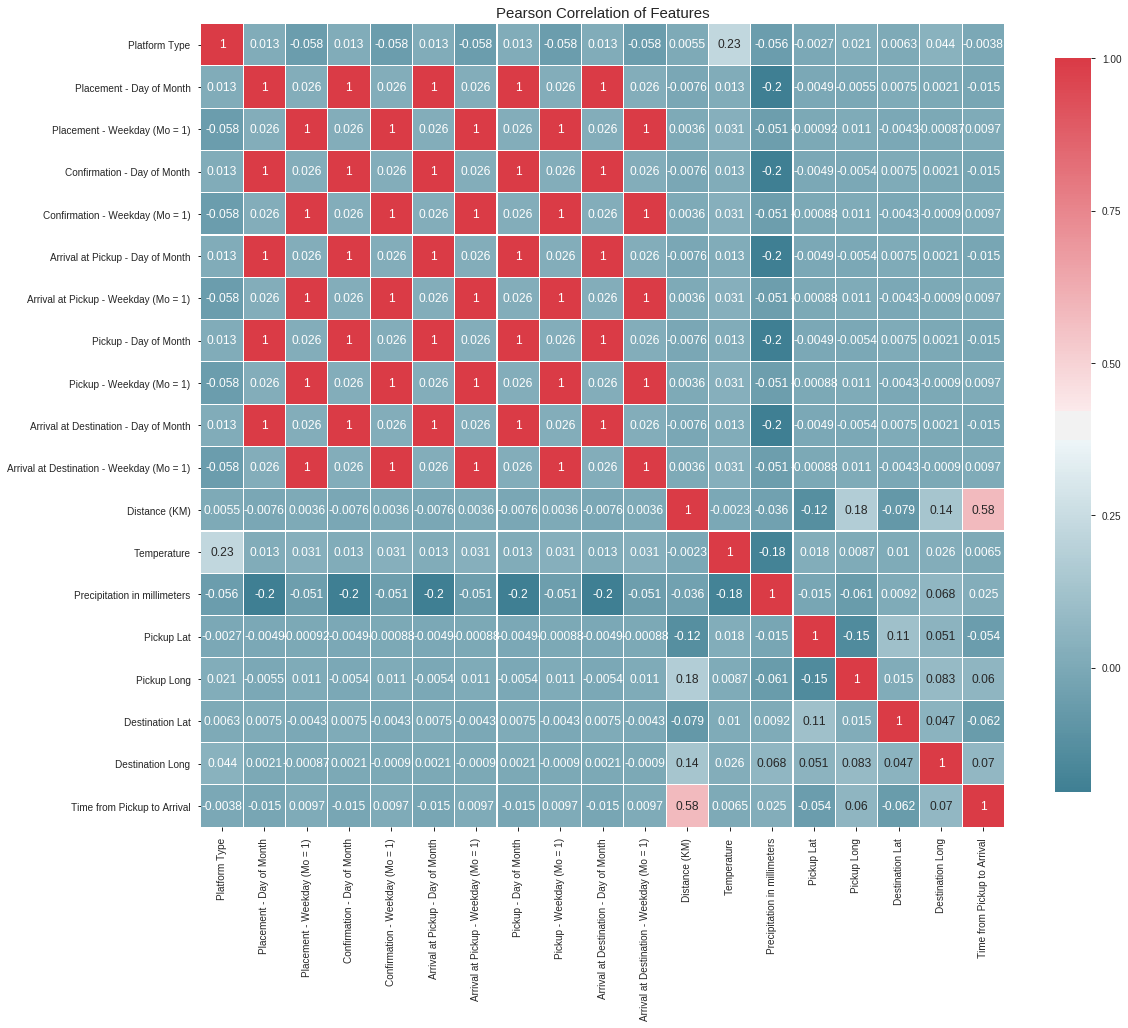

In [0]:
# Ploting the bivariate summaries and recording our observations
#
# correlation heatmap of dataset

def correlation_heatmap(train):
  
    _ , ax = plt.subplots(figsize =(18, 15))
    
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        
        train.corr(), 
        
        cmap = colormap,
        
        square=True, 
        
        cbar_kws={'shrink':.9 }, 
        
        ax=ax,
        
        annot=True, 
        
        linewidths=0.1,vmax=1.0, linecolor='white',
        
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

In [0]:
# OBSERVATION: 

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 1008x1008 with 0 Axes>

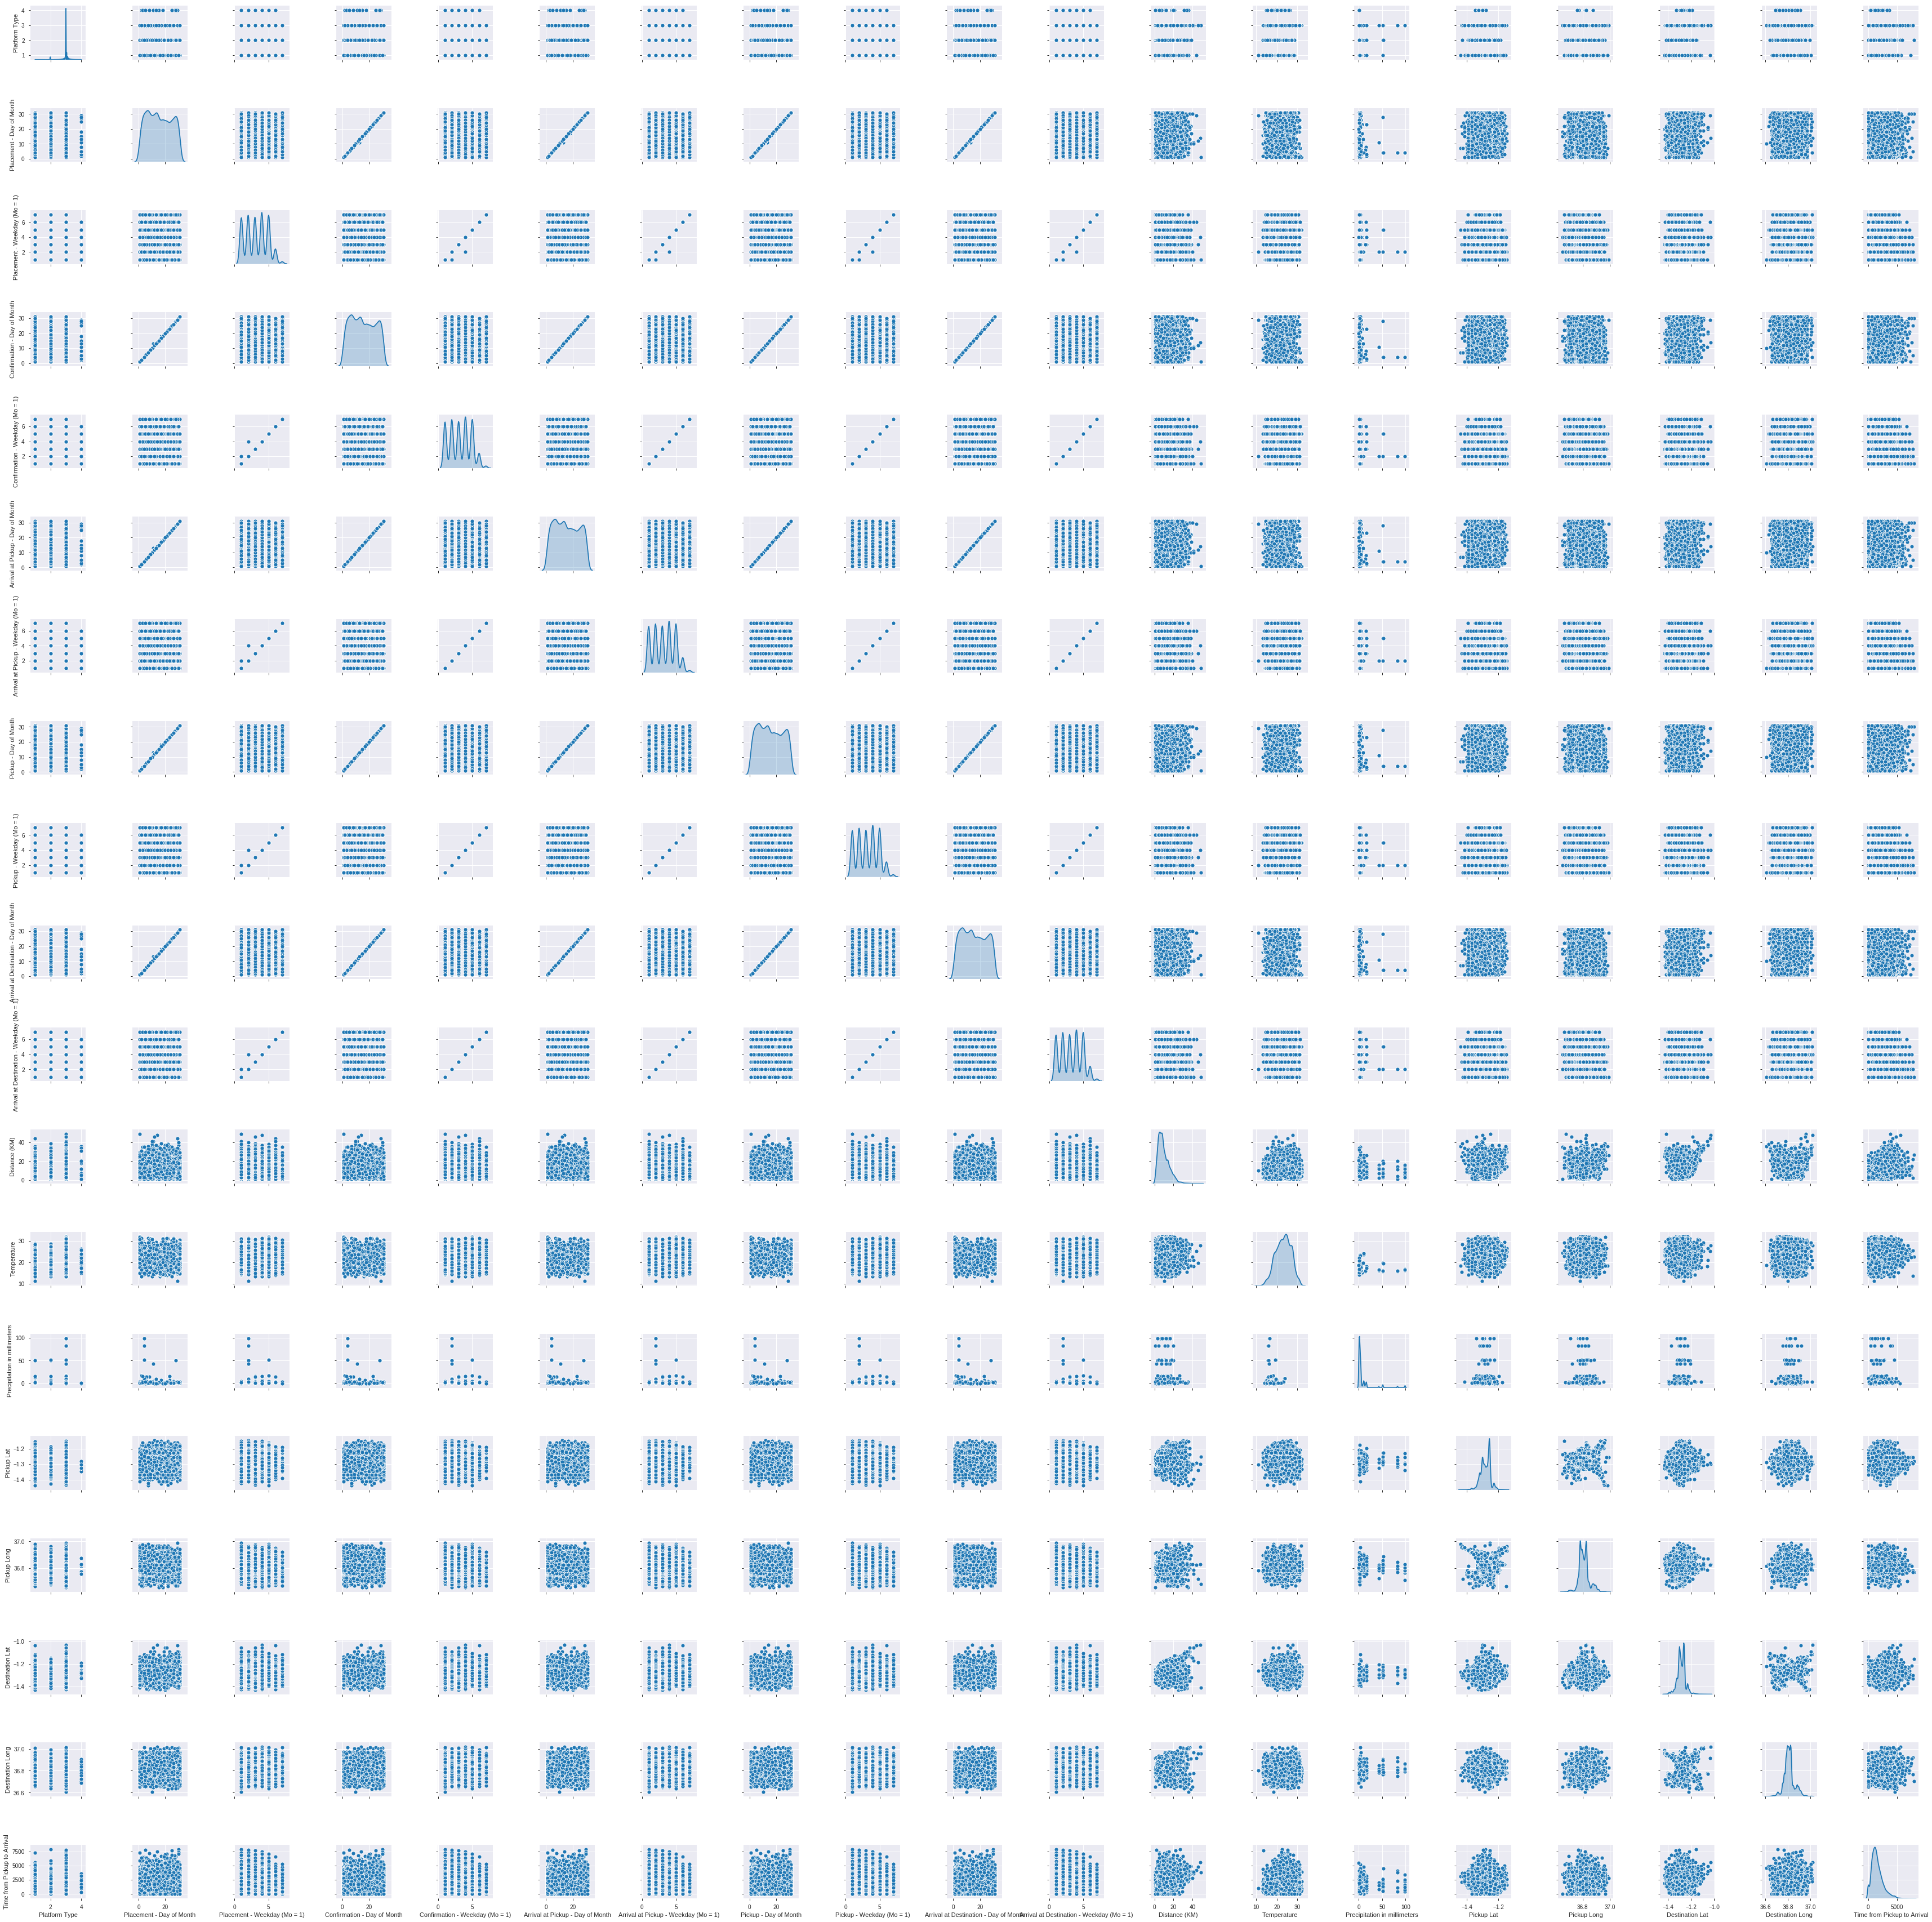

In [0]:
# Crossplots distribution

plt.figure(figsize=(14, 14))




sns.pairplot(train, diag_kind='kde');

In [0]:
# OBSERVATION:

### c. Multivariate Analysis

#### Getting Dummies for Categorical columns

In [0]:
# Size of new dataframe

train.shape

(21201, 29)

#### Splitting Data Target & Feature sets

In [0]:
# Selecting the columns to be used as data for accuracy testing

cols = [col for col in train.columns if col not in ['  ']]
                                                   
      

X = train[cols]


#assigning the target column

y = train['  ']


X_test = test[cols]


### Normalisation & P.C.A

In [0]:
# Normalizing the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X,y)

X_test = sc.transform(X_test)
  

In [0]:
# Applying PCA

from sklearn.decomposition import PCA
  
pca = PCA()
  
X_train = pca.fit_transform(X,y)
  
X_test = pca.transform(X_test)
  

### Testing our Machine Learning Model

#### Random Forest Model

In [0]:
components = {}

for i in np.arange(1, len(X.columns)+1):
  
  
  # Training and Making Predictions
  
  # The random forest classification classifier has been used to make predictions.
  
  from sklearn.linear_model import LogisticRegression
  
  classifier = LogisticRegression(random_state = 0)
  
  classifier.fit(X, y)
  
  
  # Predicting the Test set results
  
  y_pred = classifier.predict(X_test)
  
  
  # Performing evaluation
  
  from sklearn.metrics import confusion_matrix
  
  from sklearn.metrics import accuracy_score
  
  cm = confusion_matrix(y, y_pred)
  
  acc = accuracy_score(y, y_pred)
  
  
  print(cm)
  
  print(acc)
  
components.update({'n_components ' + str(i) : 'accuracy ' + str(acc*100)})

components

## 6. Implementing the Solution

In [0]:
# Implementing the Solution
# 
x = df.groupby(['']).sum().copy()

ax = x.sort_values(by = '',ascending=False).plot(kind='bar', figsize=(18, 5));

for p in ax.patches:
  
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() /89.170) )+ "%", 
                
                (p.get_x() * 1.007, p.get_height() * 0.75),
                
                color='black')


## 7. Challenging the solution

In [0]:
#predicting with xgboost

model = XGBClassifier(n_estimators=1500,learning_rate =0.25)

model.fit(X, y)

In [0]:
# Calculating Feature Importance

print(model.feature_importances_)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})

importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances

In [0]:
# make predictions for test data

y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

In [0]:
# Model Accuracy

model.score(X, y)

In [0]:
# Feature Importance Visualization

importances.plot.bar()

plt.show()

## 8. Follow up questions

### a). Did we have the right data?

>.......

### b). Do we need other data to answer our question?

>.........

### c). Did we have the right question?

>........

## Conclusion

>................